In [4]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 5.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 4.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install utils

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Zadanie 1.

In [14]:
import numpy as np
import plotly.graph_objects as go
import utils
import pandas as pd
import math as math
import scipy.stats as stats

wyniki = pd.read_csv('wyniki.csv')
wyniki

,plec,ocena_koncowa
0,F,6
1,F,6
2,F,10
3,F,15
4,F,10
...,...,...
352,M,9
353,M,16
354,M,7
355,M,10


In [15]:
wyniki_M = wyniki['plec'].where(wyniki["plec"] == 'M')
wyniki_F = wyniki['plec'].where(wyniki["plec"] == 'F')

length_M = wyniki_M.count()
length_F = wyniki_F.count()

print(length_M)
print(length_F)

172
185


In [16]:
oceny_M = wyniki.where(wyniki['plec'] == 'M')
oceny_F = wyniki.where(wyniki['plec'] == 'F')

mean_M  = float(oceny_M.mean())
mean_F  = float(oceny_F.mean())

print(mean_M)
print(mean_F)

11.866279069767442
11.205405405405406


/var/folders/d1/dzd33zmx2c939p1hzdzvfycc0000gn/T/ipykernel_1788/537212197.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_M  = float(oceny_M.mean())
/var/folders/d1/dzd33zmx2c939p1hzdzvfycc0000gn/T/ipykernel_1788/537212197.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_F  = float(oceny_F.mean())


In [17]:
series_M = oceny_M['ocena_koncowa'].dropna().tolist()
series_F = oceny_F['ocena_koncowa'].dropna().tolist()

list_M = []
list_F = []

for n in series_M:
    list_M.append(n)

for n in series_M:
    list_M.append(n)


list_M = np.array(list_M)
list_F = np.array(list_F)

In [24]:
s2_M = np.sum( (list_M - mean_M)**2) / length_M
s2_F = np.sum( (list_F - mean_F)**2) / length_F

s_M = np.sqrt(s2_M)
s_F = np.sqrt(s2_F)

alpha = 0.05

In [25]:
t_statistic = (mean_M - mean_F)/ math.sqrt((s_M**2/length_M)+(s_F**2/length_F))
df = (length_M + length_F) - 1
p_value = stats.t.sf(abs(t_statistic), df = df)

print("p-value = ", p_value)


p-value =  0.030042271297216913


In [26]:
print(p_value < alpha)

#Hipoteza zerowa nie zostaje odrzucona, gdyż p-value jest mniejsze of alfa

True


In [ ]:
#Zadanie 2.

#H0 - brak liniowej zależności zysku od czasu

In [35]:
import pandas as pd
import plotly.express as px
import statsmodels.formula.api as smf
import plotly.graph_objects as go

In [36]:
x = pd.read_csv('ZyskiFirmyX.csv')
x

,Rok,Zysk
0,1821,1645
1,1822,658
2,1823,1926
3,1824,865
4,1825,764
...,...,...
195,2016,988
196,2017,895
197,2018,-178
198,2019,543


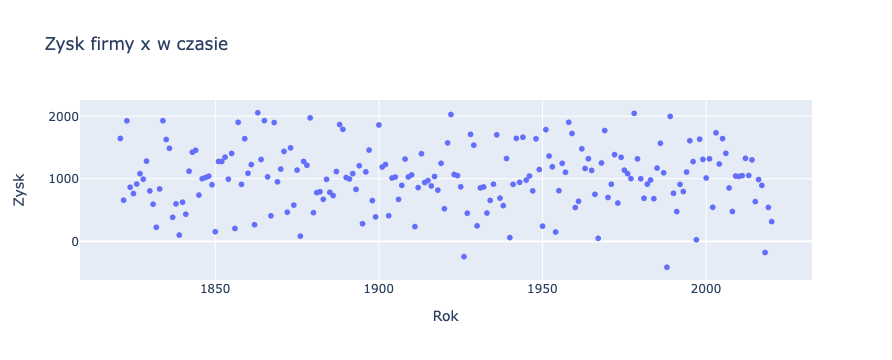

In [37]:
px.scatter(x, "Rok", "Zysk", title = "Zysk firmy x w czasie")

In [39]:
model = smf.ols(formula = "Zysk ~ Rok", data = x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Zysk   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.09357
Date:                Mon, 23 Jan 2023   Prob (F-statistic):              0.760
Time:                        22:52:34   Log-Likelihood:                -1521.3
No. Observations:                 200   AIC:                             3047.
Df Residuals:                     198   BIC:                             3053.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1373.8795   1150.888      1.194      0.2

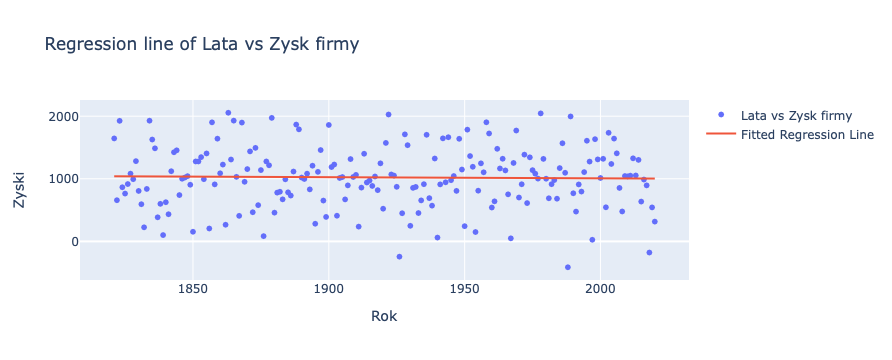

In [42]:
x["fitted"] = model.fittedvalues

fig = go.Figure()

fig.add_trace(go.Scatter(x=x["Rok"], y=x["Zysk"], name="Lata vs Zysk firmy", mode="markers"))
fig.add_trace(go.Scatter(x=x["Rok"], y=x["fitted"], name="Fitted Regression Line"))
fig.update_layout(title="Regression line of Lata vs Zysk firmy", xaxis_title="Rok", yaxis_title="Zyski")

fig.show()

In [43]:
model.pvalues

Intercept    0.234002
Rok          0.760008
dtype: float64

In [ ]:
#opisać!!!

In [44]:
#Zadanie 3.

In [52]:
spending = pd.read_csv('spendingscores.csv')
spending

,Gender,Age,AnnualIncome,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [53]:
def plot_scatter_and_line(x, scatter_y, line_y, scatter_name, line_name, title, x_title, y_title):

    fig = go.Figure()
    
    fig.add_trace(go.Scatter(
        x=x, y=scatter_y, name=scatter_name, mode="markers"))
    fig.add_trace(go.Scatter(
        x=x, y=line_y, name=line_name))
    fig.update_layout(title=title, xaxis_title=x_title,
        yaxis_title=y_title)
    
    return fig

In [54]:
model2 = smf.ols("SpendingScore ~ Age + Gender + AnnualIncome", data=spending).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          SpendingScore   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     7.960
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           4.91e-05
Time:                        22:57:42   Log-Likelihood:                -922.05
No. Observations:                 200   AIC:                             1852.
Df Residuals:                     196   BIC:                             1865.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         73.9300      6.642     11.

In [55]:
model2.pvalues

Intercept         1.287752e-22
Gender[T.Male]    5.671172e-01
Age               3.055177e-06
AnnualIncome      9.050939e-01
dtype: float64

In [56]:
model2.params.to_dict()

{'Intercept': 73.930033577722,
 'Gender[T.Male]': -2.0132337520811663,
 'Age': -0.60037103973921,
 'AnnualIncome': 0.007929395096795404}

In [57]:
s = sum(model2.resid)/200
s

9.261924560632906e-14

In [58]:
spending.corr()

/var/folders/d1/dzd33zmx2c939p1hzdzvfycc0000gn/T/ipykernel_1788/1732053963.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Age,AnnualIncome,SpendingScore
Age,1.000000,-0.012398,-0.327227
AnnualIncome,-0.012398,1.000000,0.009903
SpendingScore,-0.327227,0.009903,1.000000


/var/folders/d1/dzd33zmx2c939p1hzdzvfycc0000gn/T/ipykernel_1788/1349202230.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



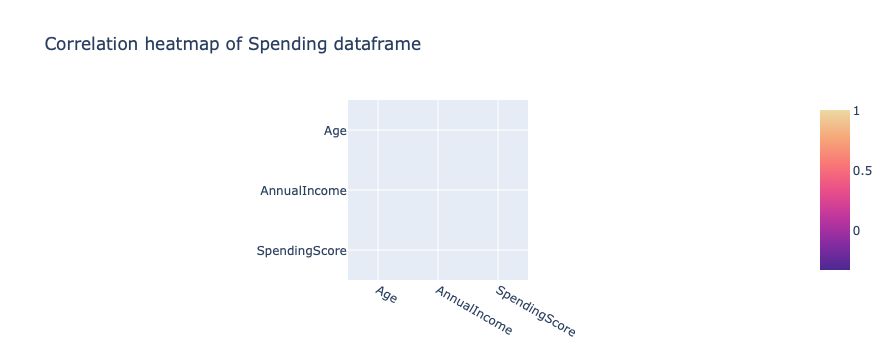

In [59]:
px.imshow(spending.corr(), color_continuous_scale='Agsunset', title="Correlation heatmap of Spending dataframe")